<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Image%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

In [ ]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

# Data

So far, we've doing classification which is recognising an object in an image. Today though, we will be doing **segmentation** which includes classifying every single pixel in an image! Sounds cool right? 

We will be using the `CAMVID` dataset today which includes labeled driving data. An example of the dataset is shown below.

![](https://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/pr/DBOverview1_1_huff_0000964.jpg)

## Looking at data

Let's first start by downloading the dataset.

In [ ]:
# download and extract the dataset
path = untar_data(URLs.CAMVID)

This dataset is slightlty more complex and we should look at the structure of it before continuing.

In [ ]:
# view the dataset structure
path.ls()

[PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

Let's define a variable for each folder and file that we see here.

In [ ]:
# get a reference to each path
images_path = path/'images'
labels_path = path/'labels'
valid_path = path/'valid.txt'
codes_path = path/'codes.txt'

Just a side note on what each folder contains
* `/images` a list of training images
* `/labels` a list of label images (notice that the labels are now images because the output of our model is no longer just object names, it's actually an image with different colours for different objects)
* `valid.txt` this file contains a list of filenames to be used for the validation dataset
* `codes.txt` this file contains the name of each object for our labels

Ok, let's look at some images from the `/images` folder

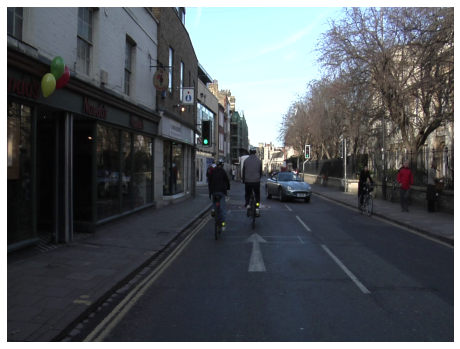

In [ ]:
# read the name of the images files
images = get_image_files(images_path)

# select an image
img = images[0]

# read and display the image
open_image(img).show(figsize=(8,8))

Now that we know what the training images look like, let's have a look at our label images

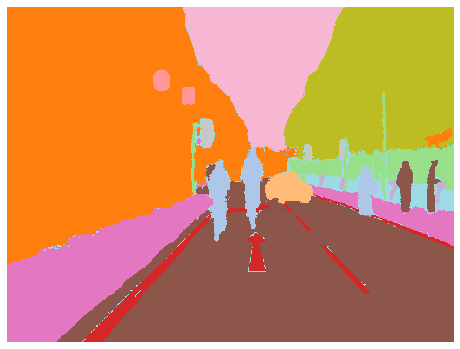

In [ ]:
# define a lambda function to select the label correspoding to a training image
get_label = lambda x: labels_path/f'{x.stem}_P{x.suffix}'

# select the label
label = get_label(img)

# display the label with mask
open_mask(label).show(figsize=(8,8), alpha=1)

Don't worry too much about how these functions are actually doing here. The key point is that each pixel on this image has a different colour which is associated with a different classification.

> We know what each pixel in the image represents.

---

Can you think of an example where **segmentation** like the one shown above can be very useful?

---

Lastly, let's also look at the `codes.txt` file which includes all the possible segmentation objects that have been labelled in our dataset.

In [ ]:
# read the codes.txt using numpy
codes = np.loadtxt(codes_path, dtype=str)

# print codes
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Dataloader

Time to define our good friend `dataloader` using the following syntax. Hopefully you can recognise some of these functions from the previous sections. It is not super important to know the syntax but it is important to know high-level what each of these methods are doing.

In [ ]:
data = SegmentationItemList.from_folder(images_path) \
                            .split_by_fname_file(valid_path) \
                            .label_from_func(get_label, classes=codes) \
                            .transform(get_transforms()) \
                            .databunch(bs=8) \
                            .normalize(imagenet_stats)

What each method is doing
* `from_folder` retrieves a list of all traning images
* `split_by_fname_file` split training and validation set based on the filenames listed in `valid_path`
* `label_from_func` grab the labels for images using the `get_label` function defined earlier
* `transform` apply the default transformations using `get_transforms()` function
* `databunch` create the dataloader from the options described earlier
* `normalize` normalize the images to reduce spread in our values which helps training the model later on 

Now let's view a batch of our training data!

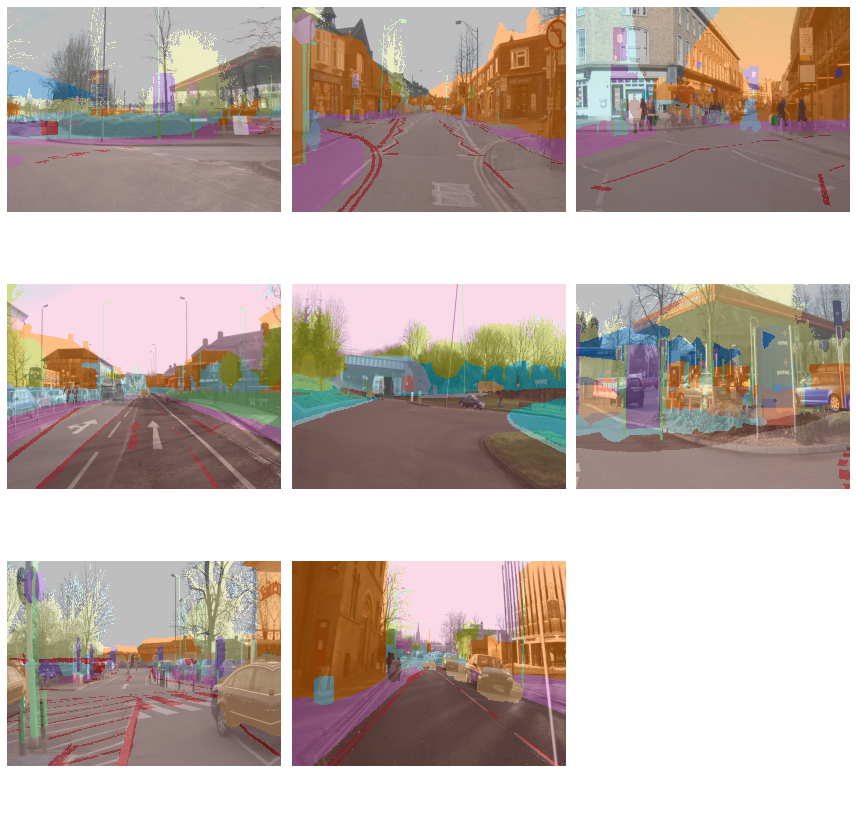

In [ ]:
# use the show_batch() method to display a batch of images
## YOUR CODE HERE

data.show_batch()

Awesome! we are now ready to train our model.